- The outputs from the pest analysis for three cases is analyzed here.
The following files have been used for the output analysis:

1. Case1_B: 
    - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Output_analysis_Case1_su_cv_rw.ipynb - ipynb file where the outputs from the file Case1_su_cv_rw.demo is synthesized.
    - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Case1_su_cv_rw.demo - The outputs from the PEST simulation after reweighting strategy.
    - 

    Outputs:
    - Best parameters - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/best_params_Case1_su_cv_rw.csv
    - Best residuals - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/best_res_Case1_su_cv_rw.csv
    - Best simulation - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/finalsim_Case1_su_cv_rw.csv
    - Best sensitivity - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/best_sen_Case1_su_cv_rw.csv
    - Measurement data used for comparison - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/mes_data_Case1_su_cv_rw.csv
    - Objective function value after each iteration - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/obj_fn_Case1_su_cv_rw.csv
    

2. Case5: 
    - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Output_analysis_Case5_su_cv_rw.ipynb - ipynb file where the outputs from the file Case5_su_cv_rw.demo is synthesized.
    - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Case5_su_cv_rw.demo - The outputs from the PEST simulation after reweighting strategy.
    - 

    Outputs:
    - Best parameters - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/best_params_Case5_su_cv_rw.csv
    - Best residuals - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/best_res_Case5_su_cv_rw.csv
    - Best simulation - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/finalsim_Case5_su_cv_rw.csv
    - Best sensitivity - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/best_sen_Case5_su_cv_rw.csv
    - Measurement data used for comparison - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/mes_data_Case5_su_cv_rw.csv
    

3. Case5_III: 
    - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Output_analysis_Case5_III_su_cv_rw.ipynb - ipynb file where the outputs from the file Case5_III_su_cv_rw.demo is synthesized.
    - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Case5_III_su_cv_rw.demo - The outputs from the PEST simulation after reweighting strategy.

    Outputs:
    - Best parameters - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/best_params_Case5_III_su_cv_rw.csv
    - Best residuals - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/best_res_Case5_III_su_cv_rw.csv
    - Best simulation - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/finalsim_Case5_III_su_cv_rw.csv
    - Best sensitivity - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/best_sen_Case5_III_su_cv_rw.csv
    - Measurement data used for comparison - /home/rk/pestpp/pestpp/rk_model_final_4yrs_su/Final_comp_cases_data/mes_data_Case5_III_su_cv_rw.csv


Describe the process later?

Note:
- All of the input files was generated from the jupyter notebooks: {Case_name}_pestpp_fileprep
- The outputs was analyzed from the jupyter notebooks: Output_analysis_{Case_name}. The corresponding files were extracted from these jupyter notebook to be analyzed here.

The following files will be analyzed in this notebook:
1. Objective function after each iteration
2. Residual files (for the least objective function) - With the simulated temperature and moisture
3. Parameter files (for the least objective function) 
4. Sensitivity files (for the least objective function)

A comparison for the three cases will be made here!

In [1]:
#import sys
#sys.path.insert(0,'../pestools')

In [2]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model_final_4yrs_su


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [6]:
comp_dir = 'Final_comp_cases_data'

In [7]:
# Control file names
cf_name_1 = 'Case1_su_cv_rw'
cf_name_2 = 'Case5_su_cv_rw'
cf_name_3 = 'Case5_III_su_cv_rw'
#cf_name_4 = 'Case5_III_C_glm_cf_v1_rw'

In [8]:
cf_names = [cf_name_1, cf_name_2, cf_name_3]
for i, name in enumerate(cf_names):
    print(i, name)

0 Case1_su_cv_rw
1 Case5_su_cv_rw
2 Case5_III_su_cv_rw


#### b. Parameter Sensitivity 

In [9]:
### Creating a dataframe with the parameters (Note that Case 1 has only 20 parameters)
#sen_itr = pd.read_csv(f'{comp_dir}/best_sen_{cf_name_4}.csv',index_col=0)
#sen_itr.rename(columns={"22":f"{cf_name_1}"},inplace=True)

#sen_cases = pd.DataFrame(columns=sen_itr.index)
#sen_cases.loc[f'{cf_name_1}',:] = sen_itr.iloc[:,0]
#sen_cases

In [10]:
###  Extracting the parameter sensitivity for the three and creating a single dataframe

### Creating a dataframe with the parameters (Note that Case 1 has only 20 parameters)
sen_itr = pd.read_csv(f'{comp_dir}/best_sen_{cf_name_1}.csv',index_col=0)
sen_itr.rename(columns={"22":f"{cf_name_1}"},inplace=True)

sen_cases = pd.DataFrame(columns=sen_itr.index)


# Total number of cases:
case_nos = np.arange(1,4,1)

print(case_nos)

# For Case 1
sen_itr_1 = pd.read_csv(f'{comp_dir}/best_sen_Case1_su_cv_rw.csv',index_col=0)

# Renaming the column
sen_itr_1.rename(columns= {'3':f'{cf_name_1}'},inplace=True)

#for i, name in enumerate(cf_names):
    #locals()[f'sen_itr_1'] = pd.read_csv(f'{comp_dir}/best_sen_{name}.csv',index_col=0)

sen_itr_1 = sen_itr_1.transpose()

# For Case 5 
sen_itr_2 = pd.read_csv(f'{comp_dir}/best_sen_Case5_su_cv_rw.csv',index_col=0)

# Renaming the column
sen_itr_2.rename(columns= {'14':f'{cf_name_2}'},inplace=True)

sen_itr_2 = sen_itr_2.transpose()

# For Case5_III 
sen_itr_3 = pd.read_csv(f'{comp_dir}/best_sen_Case5_III_su_cv_rw.csv',index_col=0)

# Renaming the column
sen_itr_3.rename(columns= {'6':f'{cf_name_3}'},inplace=True)

sen_itr_3 = sen_itr_3.transpose()

[1 2 3]


In [11]:
sen_itr_2

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
Case5_su_cv_rw,0.000049,0.000913,0.000002,0.000007,0.00001,0.000009,35767.4,3823440.0,2.839010e-17,0.000026,5.678030e-17,2.521150e-08


In [12]:
sen_itr_3

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
Case5_III_su_cv_rw,0.000095,0.000113,0.00001,0.000061,0.000016,0.000018,3242.81,1275200.0,0.000002,0.000001,0.000189,4.504170e-08


In [13]:
# Create one single dataframe with all the sensitive values

sen_cases = pd.concat([sen_itr_2, sen_itr_3])


#sen_case2_missing = pd.DataFrame(columns=['n_m':0, 'wr_m', 'tcs_p', 'tcs_m', 'tcd_p', 'tcd_m', 'af_p', 'af_m', 'auf_p', 'auf_m','den_p', 'den_m'])

# Adding the columns that are missing
sen_case2_missing = {'n_m':0, 'wr_m':0, 'tcs_p':0, 'tcs_m':0, 'tcd_p':0, 'tcd_m':0, 'af_p':0, 'af_m':0, 'auf_p':0, 'auf_m':0,'den_p':0, 'den_m':0}


# Appending the columns
sen_cases = sen_cases.append(sen_case2_missing, ignore_index = True)


# Filling the column with 0s
sen_cases.fillna(0,inplace=True)

# Rearranging the columns 
sen_cases = sen_cases[['alpha_p', 'alpha_m', 'n_p', 'n_m', 'wr_p', 'wr_m', 'tcs_p', 'tcs_m',
       'tcd_p', 'tcd_m', 'af_p', 'af_m', 'auf_p', 'auf_m', 'por_p', 'por_m',
       'perm_p', 'perm_m', 'den_p', 'den_m', 'b_bc']]

# Adding the values from Case 1
sen_cases.iloc[2,:] = sen_itr_1.iloc[0,:]

# Renindexing the dataframe
sen_cases = sen_cases.reindex([2,0,1])

# Renaming the rows
#sen_cases.rename(index={0:"Case5_su_cv_rw",1:"Case1_su_cv_rw"},inplace=True)
sen_cases.rename(index={0:"Case5_su_cv_rw",2:"Case1_su_cv_rw",1:"Case5_III_su_cv_rw"},inplace=True)


sen_cases

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
Case1_su_cv_rw,0.000158,0.000329,0.000002,0.000001,0.000011,0.00001,0.000004,0.000001,0.000004,4.402030e-07,...,1.568450e-07,0.000002,9.604300e-08,0.000005,0.000005,4579.96,804846.0,4.389120e-08,2.079640e-08,1.318230e-08
Case5_su_cv_rw,0.000049,0.000913,0.000002,0.000000,0.000007,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000010,0.000009,35767.40,3823440.0,0.000000e+00,0.000000e+00,2.521150e-08
Case5_III_su_cv_rw,0.000095,0.000113,0.000010,0.000000,0.000061,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000016,0.000018,3242.81,1275200.0,0.000000e+00,0.000000e+00,4.504170e-08


In [14]:
###  Extracting the parameter sensitivity for the two (three) cases and creating a single dataframe

### Creating a dataframe with the parameters (Note that Case 1 has only 20 parameters)
#sen_itr = pd.read_csv(f'{comp_dir}/best_sen_{cf_name_1}.csv',index_col=0)
#sen_itr.rename(columns={"22":f"{cf_name_1}"},inplace=True)

#sen_cases = pd.DataFrame(columns=sen_itr.index)


# Total number of cases:
#case_nos = np.arange(1,3,1)

#for i, name in enumerate(cf_names):
    #locals()[f'sen_itr_{i+1}'] = pd.read_csv(f'{comp_dir}/best_sen_{name}.csv',index_col=0)
    #print(i+1)
    
    # Since the surface parameters are not considered for the 1st case - thier sensitivity will also be zero 
    # In order to ensure that the dataframe is created, we need to add 6 columns and add 0 to it.
    #if i+1 == 1:
        # A
        #locals()[f'sen_itr_{i+1}'] = locals()[f'sen_itr_{i+1}'].append(sen_itr.iloc[20:26,:])
        #locals()[f'sen_itr_{i+1}'].drop(columns=['4'], inplace=True)
        #print(sen_itr_1)
        
        #locals()[f'sen_itr_{i+1}'].iloc[20:26,:] = 0.0

        
    #sen_cases.loc[f'{name}',:] = locals()[f'sen_itr_{i+1}'].iloc[:,0]

#sen_cases   

In [15]:
### Creating a dataframe with the parameters (Note that Case 1 has only 20 parameters)
#sen_itr = pd.read_csv(f'{comp_dir}/best_sen_{cf_name_3}.csv',index_col=0)
#sen_itr.rename(columns={"22":f"{cf_name_1}"},inplace=True)
#sen_itr

In [16]:
#sen_iteration = pd.read_csv(f'{directory_name}/{cf_name}.isen')
#sen_iteration.index = sen_iteration['iteration']
#sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
#sen_iteration

In [17]:
len(sen_cases.columns)

21

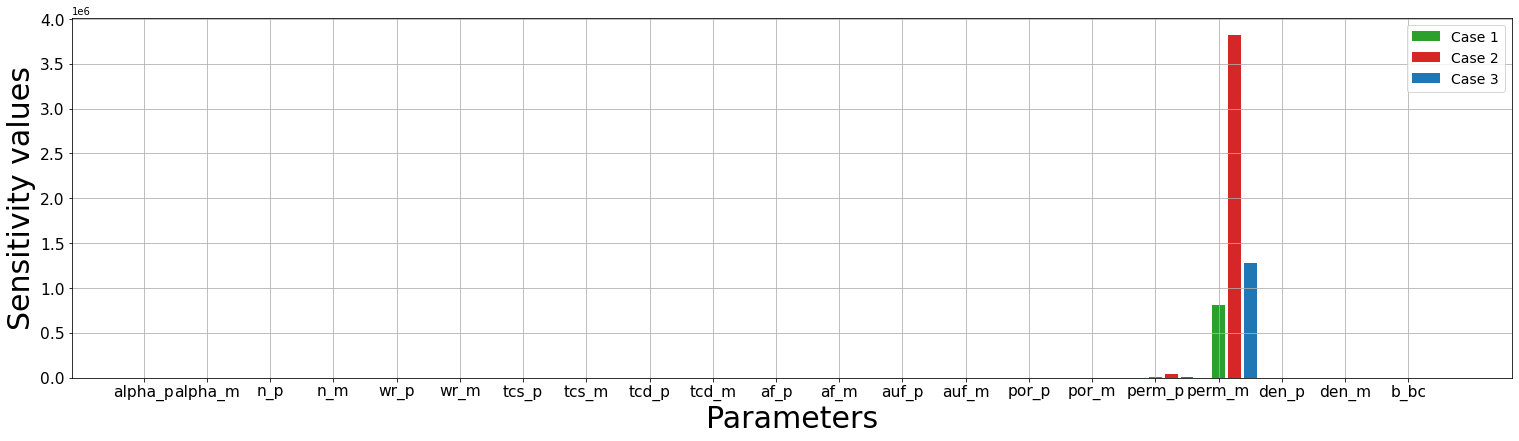

In [18]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(len(sen_cases.columns)) # Number of parts to consider
x = len(sen_cases.index)

#ax.bar(X + 0.0, sen_cases.iloc[0,:], color='y', label=f'{cf_name_1}', width=0.2)
#ax.bar(X + 0.25, sen_cases.iloc[1,:], color='b', label=f'{cf_name_2}', width=0.2)
#ax.bar(X + 0.5, sen_cases.iloc[2,:], color='k', label=f'{cf_name_3}', width=0.2)
ax.bar(X + 0.0, sen_cases.iloc[0,:], color='tab:green', label='Case 1', width=0.2)
ax.bar(X + 0.25, sen_cases.iloc[1,:], color='tab:red', label='Case 2', width=0.2)
ax.bar(X + 0.5, sen_cases.iloc[2,:], color='tab:blue', label='Case 3', width=0.2)
#ax.bar(X + 0.75, sen_cases.iloc[3,:], color='g', label=f'{cf_name_4}', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_cases.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_cases.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15.5)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlabel('Parameters', fontsize=30)
ax.grid(b=True)

### Plotting the values in a logarithmic scale:

In [19]:
sen_cases.astype(float)

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
Case1_su_cv_rw,0.000158,0.000329,0.000002,0.000001,0.000011,0.00001,0.000004,0.000001,0.000004,4.402030e-07,...,1.568450e-07,0.000002,9.604300e-08,0.000005,0.000005,4579.96,804846.0,4.389120e-08,2.079640e-08,1.318230e-08
Case5_su_cv_rw,0.000049,0.000913,0.000002,0.000000,0.000007,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000010,0.000009,35767.40,3823440.0,0.000000e+00,0.000000e+00,2.521150e-08
Case5_III_su_cv_rw,0.000095,0.000113,0.000010,0.000000,0.000061,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000016,0.000018,3242.81,1275200.0,0.000000e+00,0.000000e+00,4.504170e-08


In [20]:
# Converting the values in log scale - Need to convert the type to float
rel_cases_log = np.log(sen_cases.astype(float))
rel_cases_log.replace([np.inf, -np.inf], np.nan, inplace=True)
rel_cases_log.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
Case1_su_cv_rw,-8.752561,-8.019410,-13.232591,-13.638319,-11.445454,-11.522947,-12.498028,-13.725944,-12.558736,-14.63603,...,-15.668008,-13.249941,-16.15847,-12.281654,-12.155999,8.429446,13.598406,-16.941552,-17.688486,-18.144391
Case5_su_cv_rw,-9.913849,-6.998552,-13.403977,NaN,-11.931702,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-11.483687,-11.670692,10.484792,15.156661,NaN,NaN,-17.495966
Case5_III_su_cv_rw,-9.261426,-9.086770,-11.469081,NaN,-9.711470,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-11.029512,-10.912206,8.084196,14.058614,NaN,NaN,-16.915677


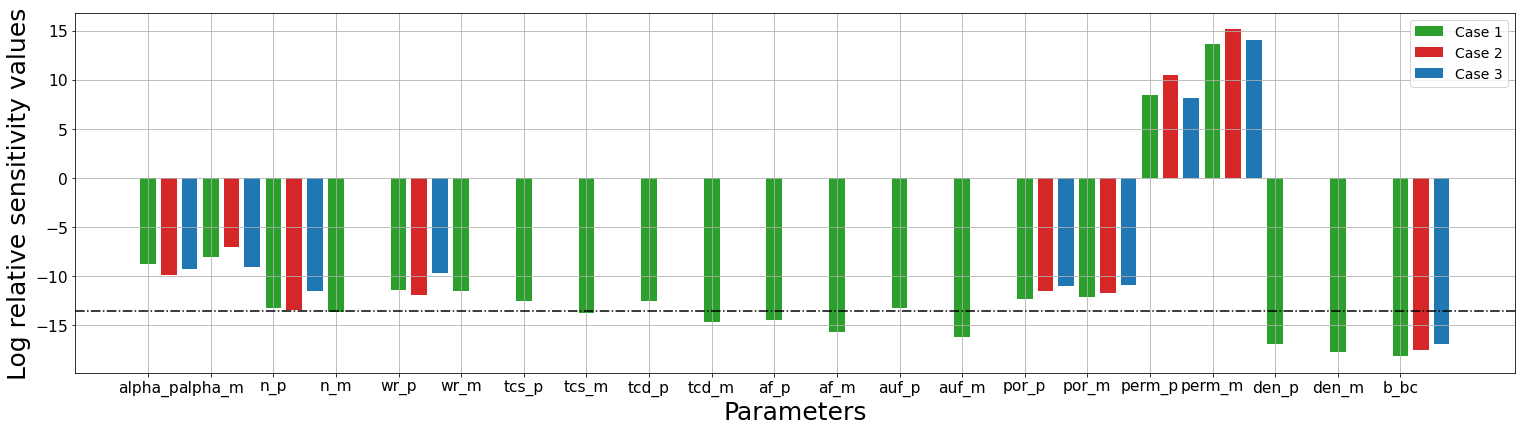

In [21]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(len(sen_cases.columns)) # Number of parts to consider
x = len(rel_cases_log.index)

ax.bar(X + 0.0, rel_cases_log.iloc[0,:], color='tab:green', label=f'Case 1', width=0.25)
ax.bar(X + 0.33, rel_cases_log.iloc[1,:], color='tab:red', label=f'Case 2', width=0.25)
ax.bar(X + 0.66, rel_cases_log.iloc[2,:], color='tab:blue', label=f'Case 3', width=0.25)
#ax.bar(X + 0.66, -rel_cases_log.iloc[3,:], color='g', label=f'Case 3', width=0.2)
#ax.bar(X + 0.25,-rel_set_itr_log.iloc[3,:], color='b', label='3rd itr', width=0.2)
#ax.bar(X + 0.5, -rel_set_itr_log.iloc[11,:], color='k', label='11th itr', width=0.2)
#ax.bar(X + 0.75,-rel_set_itr_log.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(rel_cases_log.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = rel_cases_log.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Log relative sensitivity values', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15.5)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.set_xlabel('Parameters', fontsize=25)
ax.axhline(y=-13.5,color='k',linestyle='-.')
ax.grid(b='True',which='both')

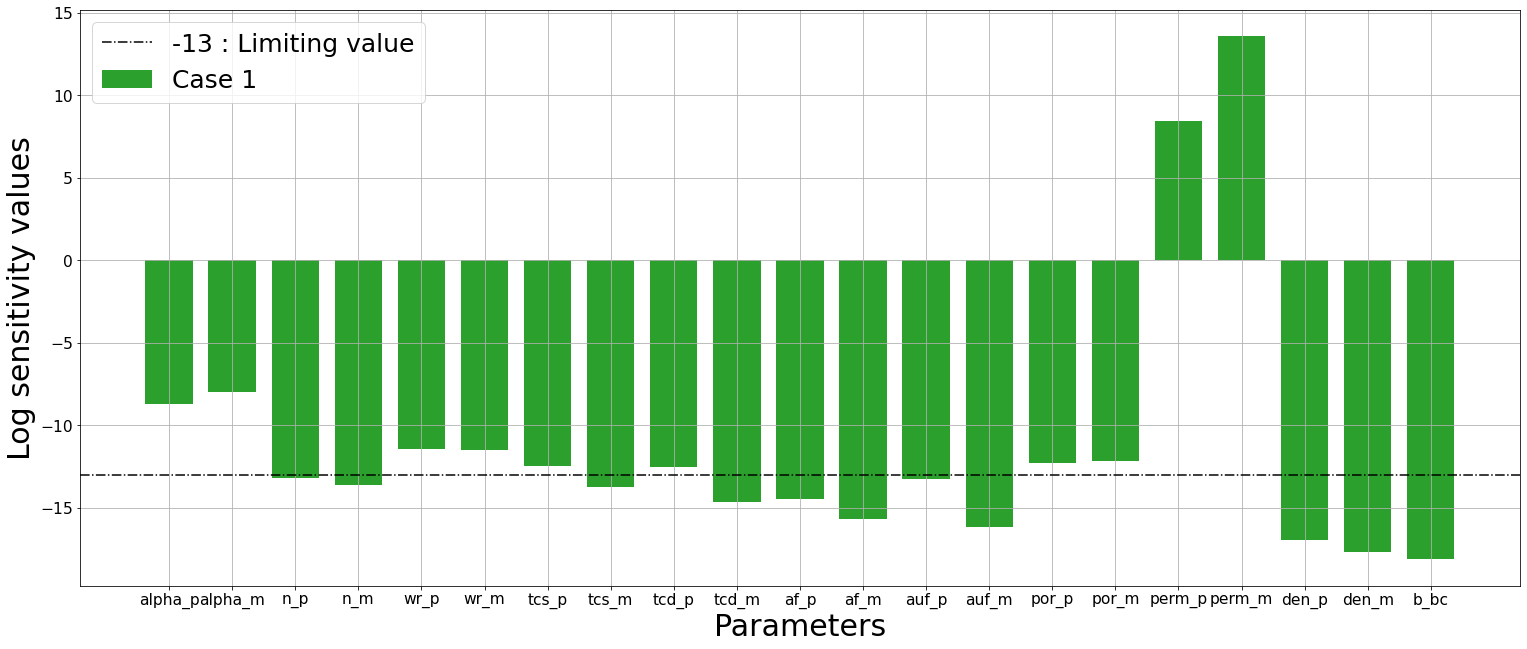

In [22]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(20,8)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(len(sen_cases.columns)) # Number of parts to consider
x = len(rel_cases_log.index)
ax.axhline(y=-13,color='k',linestyle='-.',label='-13 : Limiting value')
ax.bar(X + 0.0, rel_cases_log.iloc[0,:], color='tab:green', label=f'Case 1', width=0.75)
#ax.bar(X + 0.33, rel_cases_log.iloc[1,:], color='tab:red', label=f'{cf_name_2}', width=0.25)
#ax.bar(X + 0.66, rel_cases_log.iloc[2,:], color='tab:blue', label=f'{cf_name_3}', width=0.25)
#ax.bar(X + 0.66, -rel_cases_log.iloc[3,:], color='g', label=f'Case 3', width=0.2)
#ax.bar(X + 0.25,-rel_set_itr_log.iloc[3,:], color='b', label='3rd itr', width=0.2)
#ax.bar(X + 0.5, -rel_set_itr_log.iloc[11,:], color='k', label='11th itr', width=0.2)
#ax.bar(X + 0.75,-rel_set_itr_log.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(rel_cases_log.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = rel_cases_log.columns.values
ax.set_xticklabels(labels)

ax.set_ylabel('Log sensitivity values', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15.5)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.set_xlabel('Parameters', fontsize=30)

ax.legend(fontsize=25)
ax.grid(b='True',which='both')

In [23]:
rel_cases_log = np.round(rel_cases_log,2)

In [24]:
rel_cases_log_peat = rel_cases_log[['alpha_p','n_p','wr_p','tcs_p','tcd_p','af_p','auf_p','por_p','perm_p','den_p']]
rel_cases_log_peat

,alpha_p,n_p,wr_p,tcs_p,tcd_p,af_p,auf_p,por_p,perm_p,den_p
Case1_su_cv_rw,-8.75,-13.23,-11.45,-12.5,-12.56,-14.49,-13.25,-12.28,8.43,-16.94
Case5_su_cv_rw,-9.91,-13.40,-11.93,NaN,NaN,NaN,NaN,-11.48,10.48,NaN
Case5_III_su_cv_rw,-9.26,-11.47,-9.71,NaN,NaN,NaN,NaN,-11.03,8.08,NaN


In [25]:
rel_cases_log_min = rel_cases_log[['alpha_m','n_m','wr_m','tcs_m','tcd_m','af_m','auf_m','por_m','perm_m','den_m']]
rel_cases_log_min

,alpha_m,n_m,wr_m,tcs_m,tcd_m,af_m,auf_m,por_m,perm_m,den_m
Case1_su_cv_rw,-8.02,-13.64,-11.52,-13.73,-14.64,-15.67,-16.16,-12.16,13.60,-17.69
Case5_su_cv_rw,-7.00,NaN,NaN,NaN,NaN,NaN,NaN,-11.67,15.16,NaN
Case5_III_su_cv_rw,-9.09,NaN,NaN,NaN,NaN,NaN,NaN,-10.91,14.06,NaN


In [26]:
labels_peat = ['alpha_p','n_p','wr_p','tcs_p','tcd_p','af_p','auf_p','por_p','perm_p','den_p']
labels_min= ['alpha_m','n_m','wr_m','tcs_m','tcd_m','af_m','auf_m','por_m','perm_m','den_m'] 

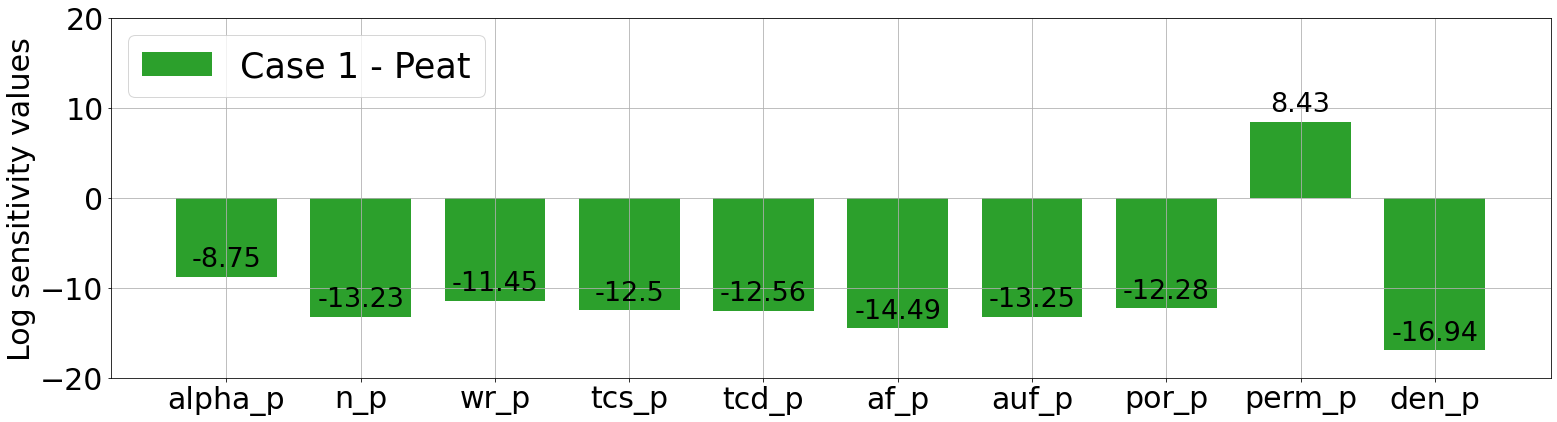

In [27]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_axes([0,0,1,1])

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1]+0.5,y_list[i-1], ha="center",va="bottom",fontsize=27)


X = np.arange(len(rel_cases_log_peat.columns)) # Number of parts to consider
x = len(rel_cases_log_peat.index)
#ax.axhline(y=-13,color='k',linestyle='-.',label='-13 : Limiting value')
ax.bar(X + 0.0, rel_cases_log_peat.iloc[0,:], color='tab:green', label=f'Case 1 - Peat', width=0.75)
add_value_label(X + 0.0, rel_cases_log_peat.iloc[0,:])

major_ticks = np.arange(0, len(rel_cases_log_peat.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = rel_cases_log.columns.values
ax.set_xticklabels(labels_peat)
ax.set_ylim(-20,20)

ax.set_ylabel('Log sensitivity values', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)
#ax.set_xlabel('Parameters', fontsize=35)

ax.legend(fontsize=35,loc=2)
ax.grid(b='True',which='both')

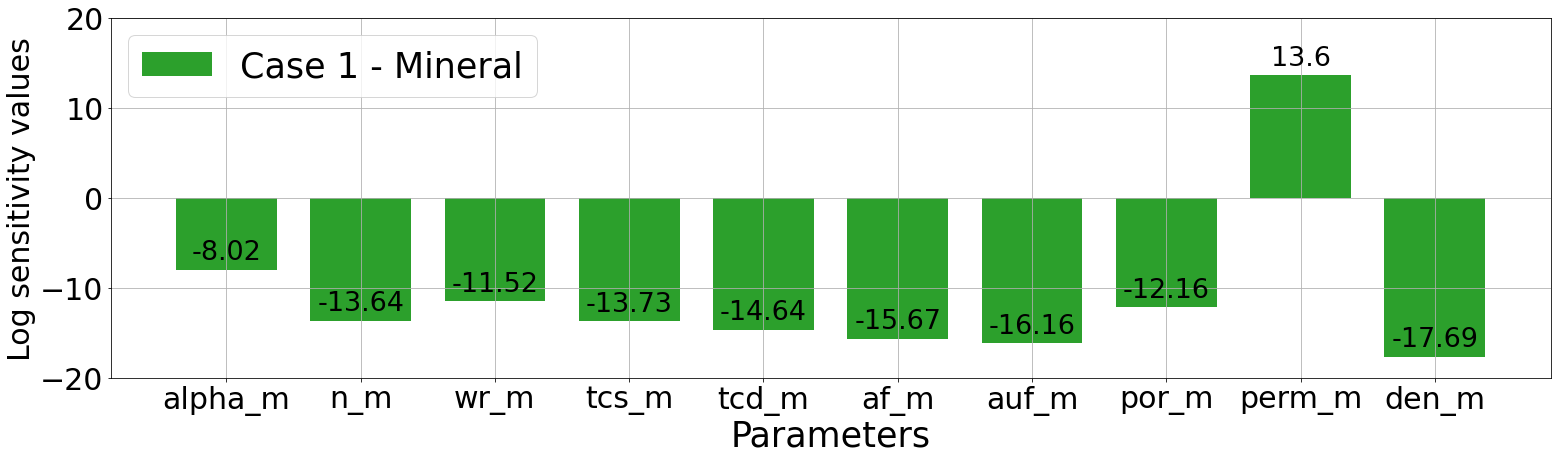

In [28]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_axes([0,0,1,1])

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1]+0.5,y_list[i-1], ha="center",va="bottom",fontsize=27)


X = np.arange(len(rel_cases_log_min.columns)) # Number of parts to consider
x = len(rel_cases_log_min.index)
#ax.axhline(y=-13,color='k',linestyle='-.',label='-13 : Limiting value')
ax.bar(X + 0.0, rel_cases_log_min.iloc[0,:], color='tab:green', label=f'Case 1 - Mineral', width=0.75)
add_value_label(X + 0.0, rel_cases_log_min.iloc[0,:])
major_ticks = np.arange(0, len(rel_cases_log_min.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = rel_cases_log.columns.values
ax.set_xticklabels(labels_min)

ax.set_ylabel('Log sensitivity values', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)
ax.set_xlabel('Parameters', fontsize=35)


ax.set_ylim(-20,20)

ax.legend(fontsize=35,loc=2)
ax.grid(b='True',which='both')

In [29]:
rel_cases_log.columns

Index(['alpha_p', 'alpha_m', 'n_p', 'n_m', 'wr_p', 'wr_m', 'tcs_p', 'tcs_m',
       'tcd_p', 'tcd_m', 'af_p', 'af_m', 'auf_p', 'auf_m', 'por_p', 'por_m',
       'perm_p', 'perm_m', 'den_p', 'den_m', 'b_bc'],
      dtype='object')

In [30]:
rel_cases_log.iloc[0,:][rel_cases_log.iloc[0,:]>-13.5]

alpha_p    -8.75
alpha_m    -8.02
n_p       -13.23
wr_p      -11.45
wr_m      -11.52
tcs_p     -12.50
tcd_p     -12.56
auf_p     -13.25
por_p     -12.28
por_m     -12.16
perm_p      8.43
perm_m     13.60
Name: Case1_su_cv_rw, dtype: float64

##### Which parameters were found most sensitive? Or which group of parameters were found most sensitive? Can you logically explain that? Which parameters were found not sensitive at all? And how do they compare with the literature/material values?

In [31]:
rel_cases_log_t = rel_cases_log.transpose()

rel_cases_log_t.sort_values(by=['Case1_su_cv_rw'],axis=0,ascending=False)

,Case1_su_cv_rw,Case5_su_cv_rw,Case5_III_su_cv_rw
perm_m,13.60,15.16,14.06
perm_p,8.43,10.48,8.08
alpha_m,-8.02,-7.00,-9.09
alpha_p,-8.75,-9.91,-9.26
wr_p,-11.45,-11.93,-9.71
wr_m,-11.52,NaN,NaN
por_m,-12.16,-11.67,-10.91
por_p,-12.28,-11.48,-11.03
tcs_p,-12.50,NaN,NaN
tcd_p,-12.56,NaN,NaN


* Most sensitive – Permeability, alpha, residual saturation, porosity, n, Saturated thermal conductivity, z 
* Least sensitive – Density, af, auf, dry thermal conductivity
* Conduct a more in-depth analysis!

##### Relative sensitivity values - compared between parameters for each case

In [32]:
relative_set_params = sen_cases.copy()
for i, value in enumerate(sen_cases.index):
    relative_set_params.iloc[i,:] = relative_set_params.iloc[i,:]/relative_set_params.iloc[i,:].max()

relative_set_params

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
Case1_su_cv_rw,1.963804e-10,4.087912e-10,2.225593e-12,1.483340e-12,1.329198e-11,1.230085e-11,4.639409e-12,1.358894e-12,4.366140e-12,5.469407e-13,...,1.948758e-13,2.187313e-12,1.193309e-13,5.760133e-12,6.531361e-12,0.005690,1.0,5.453366e-14,2.583898e-14,1.637866e-14
Case5_su_cv_rw,1.294243e-11,2.388433e-10,3.947048e-13,0.000000e+00,1.720574e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.693046e-12,2.233719e-12,0.009355,1.0,0.000000e+00,0.000000e+00,6.593931e-15
Case5_III_su_cv_rw,7.451357e-11,8.873353e-11,8.193381e-12,0.000000e+00,4.750988e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.271644e-11,1.429917e-11,0.002543,1.0,0.000000e+00,0.000000e+00,3.532128e-14


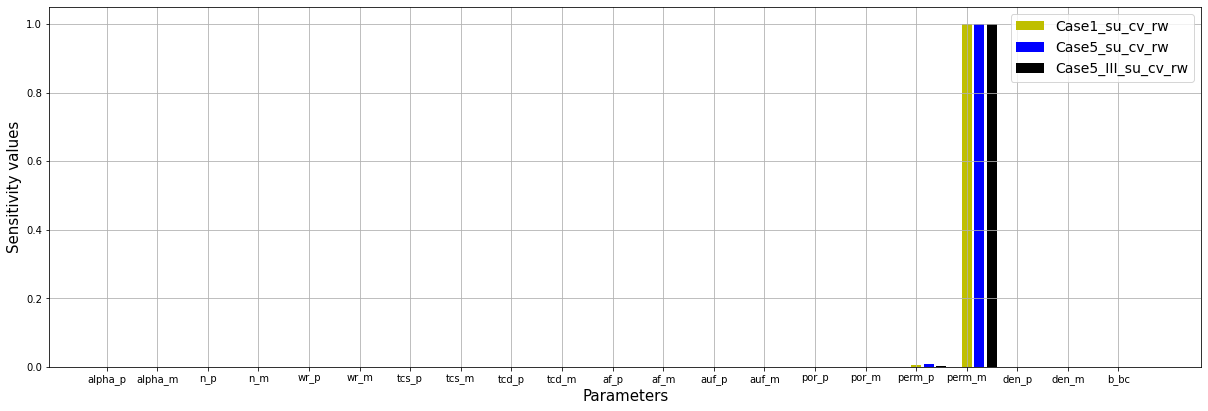

In [33]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(len(sen_cases.columns)) # Number of parts to consider
x = len(sen_cases.index)

ax.bar(X + 0.0, relative_set_params.iloc[0,:], color='y', label=f'{cf_name_1}', width=0.2)
ax.bar(X + 0.25, relative_set_params.iloc[1,:], color='b', label=f'{cf_name_2}', width=0.2)
ax.bar(X + 0.5, relative_set_params.iloc[2,:], color='k', label=f'{cf_name_3}', width=0.2)
#ax.bar(X + 0.75, relative_set_params.iloc[3,:], color='g', label=f'{cf_name_4}', width=0.2)



#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_cases.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_cases.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

In [34]:
# Converting the values in log scale - Need to convert the type to float
rel_cases_log1 = np.log(relative_set_params.astype(float))
rel_cases_log1.replace([np.inf, -np.inf], np.nan, inplace=True)
rel_cases_log1.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
Case1_su_cv_rw,-22.350967,-21.617816,-26.830998,-27.236725,-25.043860,-25.121353,-26.096434,-27.32435,-26.157142,-28.234436,...,-29.266414,-26.848347,-29.756876,-25.880061,-25.754406,-5.168961,0.0,-30.539958,-31.286892,-31.742797
Case5_su_cv_rw,-25.070510,-22.155213,-28.560638,NaN,-27.088363,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-26.640348,-26.827353,-4.671869,0.0,NaN,NaN,-32.652627
Case5_III_su_cv_rw,-23.320040,-23.145383,-25.527694,NaN,-23.770083,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-25.088126,-24.970820,-5.974418,0.0,NaN,NaN,-30.974291


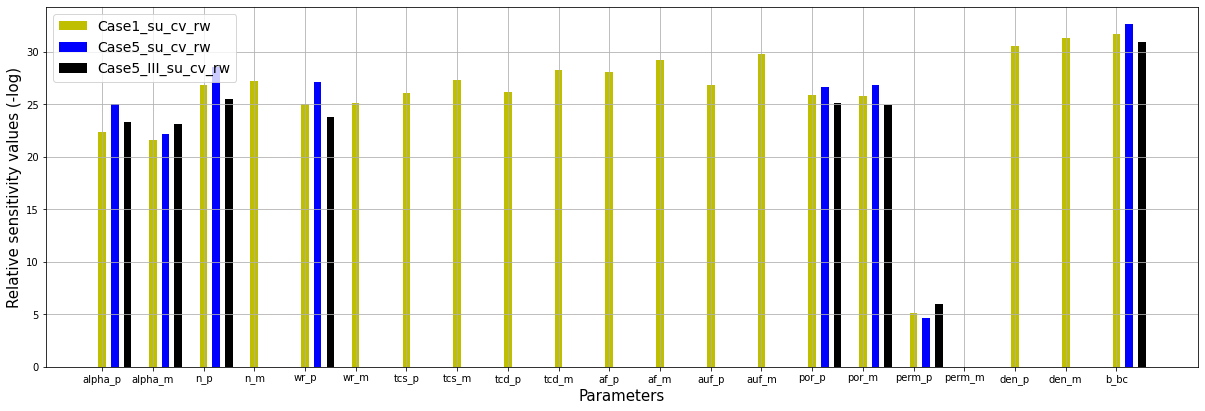

In [35]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(len(sen_cases.columns)) # Number of parts to consider
x = len(rel_cases_log1.index)

ax.bar(X + 0.0, -rel_cases_log1.iloc[0,:], color='y', label=f'{cf_name_1}', width=0.15)
ax.bar(X + 0.25, -rel_cases_log1.iloc[1,:], color='b', label=f'{cf_name_2}', width=0.15)
ax.bar(X + 0.5, -rel_cases_log1.iloc[2,:], color='k', label=f'{cf_name_3}', width=0.15)


#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(rel_cases_log1.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = rel_cases_log1.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Relative sensitivity values (-log)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b='True',which='both')

##### Relative sensitivity values - compared for each parameter between cases

In [36]:
relative_set_cases = sen_cases.copy()
for i, value in enumerate(sen_cases.columns):
    relative_set_cases.iloc[:,i] = relative_set_cases.iloc[:,i]/relative_set_cases.iloc[:,i].max()

relative_set_cases

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
Case1_su_cv_rw,1.000000,0.360286,0.171442,1.0,0.176580,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.285892,0.288289,0.128048,0.210503,1.0,1.0,0.292669
Case5_su_cv_rw,0.313083,1.000000,0.144439,0.0,0.108584,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.634972,0.468375,1.000000,1.000000,0.0,0.0,0.559737
Case5_III_su_cv_rw,0.601177,0.123908,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,1.000000,0.090664,0.333522,0.0,0.0,1.000000


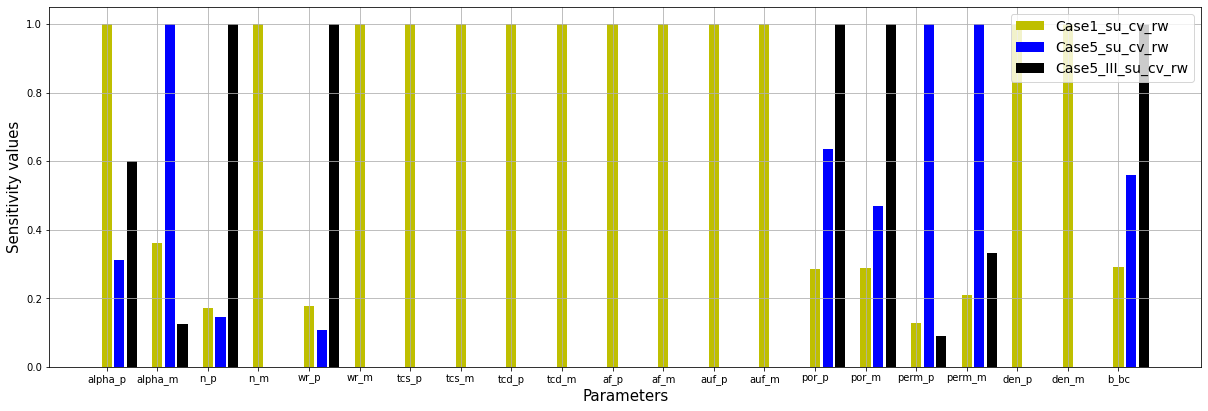

In [37]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(len(sen_cases.columns)) # Number of parts to consider
x = len(sen_cases.index)

ax.bar(X + 0.0, relative_set_cases.iloc[0,:], color='y', label=f'{cf_name_1}', width=0.2)
ax.bar(X + 0.25, relative_set_cases.iloc[1,:], color='b', label=f'{cf_name_2}', width=0.2)
ax.bar(X + 0.5, relative_set_cases.iloc[2,:], color='k', label=f'{cf_name_3}', width=0.2)
#ax.bar(X + 0.75, relative_set_cases.iloc[3,:], color='g', label=f'{cf_name_4}', width=0.2)



#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_cases.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_cases.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

###  Residuals

In [38]:
case_nos

array([1, 2, 3])

In [39]:
# Residual files - importing the values from the file

# Adding all the objective function values to one dataframe
comp_obj_fn = pd.DataFrame()


for i, name in enumerate(cf_names):
    locals()[f'obj_fn_{i+1}'] = pd.read_csv(f'{comp_dir}/obj_fn_{name}.csv',index_col=0)
    
    comp_obj_fn = comp_obj_fn.append(locals()[f'obj_fn_{i+1}']['total_phi'])

#comp_obj_fn = comp_obj_fn.rename(index=cf_names)

comp_obj_fn.index = cf_names
comp_obj_fn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Case1_su_cv_rw,0.003564,0.003449,0.003238,0.003238,0.003238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Case5_su_cv_rw,0.004396,0.003891,0.003592,0.003365,0.003152,0.003018,0.002953,0.002899,0.002832,0.002767,0.002729,0.002696,0.002666,0.002658,0.002653
Case5_III_su_cv_rw,0.019674,0.019616,0.019336,0.019335,0.018351,0.018347,0.018346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Objective function:

In [40]:
obj_test = pd.read_csv(f'{comp_dir}/obj_fn_{cf_name_1}.csv',index_col=0)
obj_test.head()

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.003564,0.003564,0,0.001782,0.001782
1,32,0.003449,0.003449,0,0.001765,0.001685
2,63,0.003238,0.003238,0,0.001732,0.001507
3,115,0.003238,0.003238,0,0.001732,0.001507
4,167,0.003238,0.003238,0,0.001732,0.001507


In [41]:
# Residual files - importing the values from the file

# Adding all the objective function values to one dataframe
comp_obj_fn = pd.DataFrame()


for i, name in enumerate(cf_names):
    locals()[f'obj_fn_{i+1}'] = pd.read_csv(f'{comp_dir}/obj_fn_{name}.csv',index_col=0)
    
    comp_obj_fn = comp_obj_fn.append(locals()[f'obj_fn_{i+1}']['total_phi'])

#comp_obj_fn = comp_obj_fn.rename(index=cf_names)

comp_obj_fn.index = cf_names
comp_obj_fn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Case1_su_cv_rw,0.003564,0.003449,0.003238,0.003238,0.003238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Case5_su_cv_rw,0.004396,0.003891,0.003592,0.003365,0.003152,0.003018,0.002953,0.002899,0.002832,0.002767,0.002729,0.002696,0.002666,0.002658,0.002653
Case5_III_su_cv_rw,0.019674,0.019616,0.019336,0.019335,0.018351,0.018347,0.018346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
comp_obj_fn.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

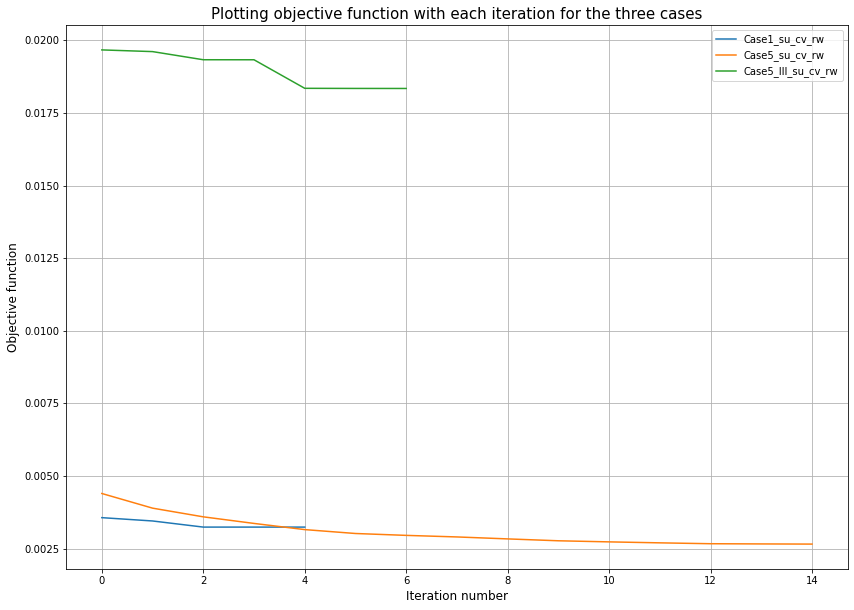

In [43]:
fig, ax = plt.subplots(figsize=(14, 10))

#plt.figure(figsize=(20, 12))

ax.plot(comp_obj_fn.iloc[0,:],label=f'{cf_name_1}')
ax.plot(comp_obj_fn.iloc[1,:],label=f'{cf_name_2}')
ax.plot(comp_obj_fn.iloc[2,:],label=f'{cf_name_3}')
#ax.plot(comp_obj_fn.iloc[3,:],label=f'{cf_name_4}')

#for i, name in enumerate(cf_names):
#    ax.plot(locals()[f'obj_fn_{i+1}']['total_phi'],label=f'{name}')
    
ax.set_title('Plotting objective function with each iteration for the three cases', fontsize=15)
ax.set_ylabel('Objective function', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)
ax.legend()

* Comments:
    - Case5_III_su_cv_rw - The objective function value is higher than for the two other cases. Since the last three iterations from 4 - 6 did not provide that much of a difference in the objective function, Maybe that's why it directly gave out the results.

### Objective function - log scale

In [44]:
comp_obj_fn_log = np.log(comp_obj_fn)
comp_obj_fn_log

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Case1_su_cv_rw,-5.637006,-5.669596,-5.732691,-5.732725,-5.732725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Case5_su_cv_rw,-5.427142,-5.549094,-5.629157,-5.694434,-5.759737,-5.803194,-5.824910,-5.843331,-5.866903,-5.889999,-5.903721,-5.916079,-5.9273,-5.929993,-5.932079
Case5_III_su_cv_rw,-3.928442,-3.931415,-3.945807,-3.945854,-3.998044,-3.998267,-3.998333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comments:**
- The objective function is reducing with each iteration.

### Residuals

In [45]:
case_nos

array([1, 2, 3])

In [46]:
cf_names

['Case1_su_cv_rw', 'Case5_su_cv_rw', 'Case5_III_su_cv_rw']

In [47]:
#test_res = pd.read_csv(f'{comp_dir}/best_res_Case1_su_cv_rw.csv',index_col=0)

#test_res.head()

In [48]:
for i, name in enumerate(cf_names):
    print(i, name)

0 Case1_su_cv_rw
1 Case5_su_cv_rw
2 Case5_III_su_cv_rw


In [49]:
# Residual files - importing the values from the file

# Creating a dataframe for residuals with the different cases:

# Dividing the simulated values between temperature and moisture
# 'Case1_su_cv_rw' - Contains the simulation for 3 years, therefore 15344/2 = 7672
# 'Case5_su_cv_rw' - Contains the simulation for 3 years, therefore 15344/2 = 7672
# 'Case5_III_su_cv_rw' - Contains the simulation for 1 year, therefore 5124/2 = 2562


for i, name in enumerate(cf_names):
    
    if i <= 1: # For Case 1 and Case 5
        locals()[f'res_{i+1}'] = pd.read_csv(f'{comp_dir}/best_res_{name}.csv',index_col=0)

        locals()[f'temp_sim_{i+1}'] = locals()[f'res_{i+1}'].iloc[:7672,3] # The 3rd column contains the simulated values 
        locals()[f'mois_sim_{i+1}'] = locals()[f'res_{i+1}'].iloc[7672:,3]
    
    else: # For Case 5_III
        locals()[f'res_{i+1}'] = pd.read_csv(f'{comp_dir}/best_res_{name}.csv',index_col=0)
        
        locals()[f'temp_sim_{i+1}'] = locals()[f'res_{i+1}'].iloc[:2562,3] # The 3rd column contains the simulated values 
        locals()[f'mois_sim_{i+1}'] = locals()[f'res_{i+1}'].iloc[2562:,3]



res_1.tail()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
15339,smois_1.6_1091,mois,4.602889,7.793264,-3.190375,0.000047,-0.000150,3.190375,0.000150,2.251191e-08,0.000695
15340,smois_1.6_1092,mois,4.572750,7.793222,-3.220472,0.000047,-0.000151,3.220472,0.000151,2.293866e-08,0.000708
15341,smois_1.6_1093,mois,4.542944,7.793183,-3.250239,0.000047,-0.000153,3.250239,0.000153,2.336466e-08,0.000722
15342,smois_1.6_1094,mois,4.513438,7.793146,-3.279708,0.000047,-0.000154,3.279708,0.000154,2.379026e-08,0.000735
15343,smois_1.6_1095,mois,4.483755,7.793111,-3.309356,0.000047,-0.000156,3.309356,0.000156,2.422232e-08,0.000748


In [50]:
mois_sim_3.head()

2562    8.824267
2563    8.836591
2564    8.842262
2565    8.846773
2566    8.849890
Name: Modelled, dtype: float64

In [51]:
temp_sim_3.head()

0    260.326172
1    262.718982
2    263.599720
3    264.222888
4    264.618277
Name: Modelled, dtype: float64

In [52]:
temp_measured = res_1.iloc[:7672,2] # The 2nd column contains the measured values and we have only temperature values from the first 2555 values
mois_measured = res_1.iloc[7672:,2]

temp_measured_Case5_III = res_3.iloc[:2562,2]
mois_measured_Case5_III = res_3.iloc[2562:,2]

In [53]:
labels = cf_names.copy()

Text(0.5, 0, 'Days')

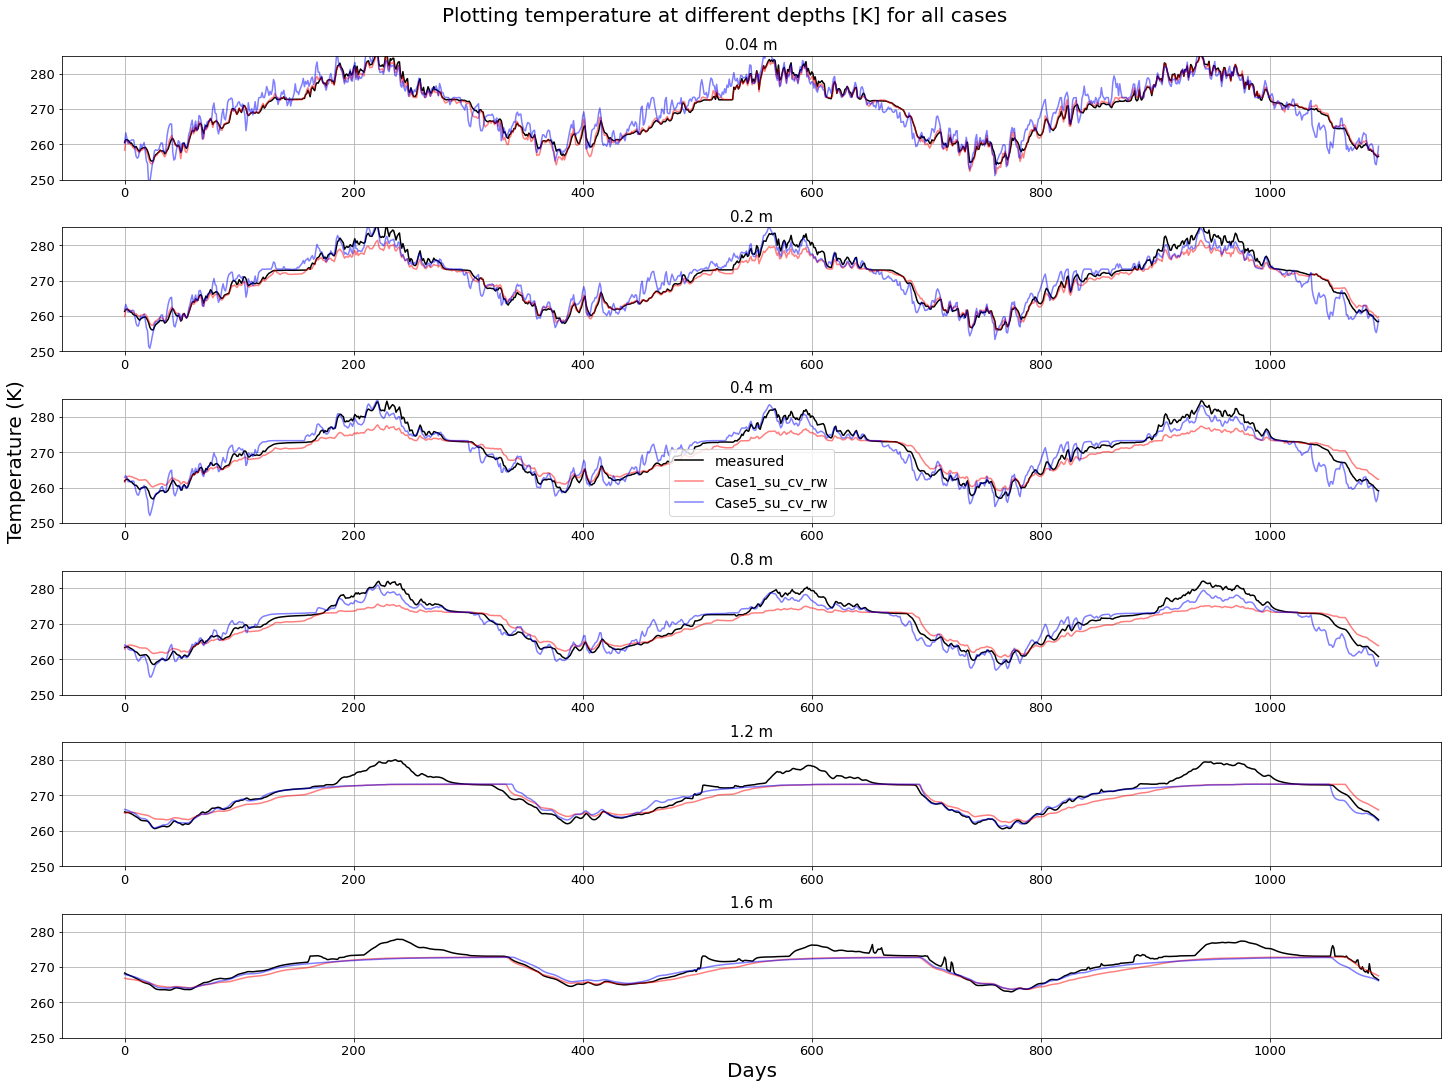

In [54]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] for all cases', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+1096].values, 'k', label=f'measured')
    
    # Simulated
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_1[x:x+1096].values, 'r', label=f'Case1_su_cv_rw',alpha=0.5)
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_2[x:x+1096].values, 'b', label=f'Case5_su_cv_rw',alpha=0.5)
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_3[x:x+365].values, 'y', label=f'{labels[2]}')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+365].values, 'g', label=f'Case 3')
    
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 1096

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

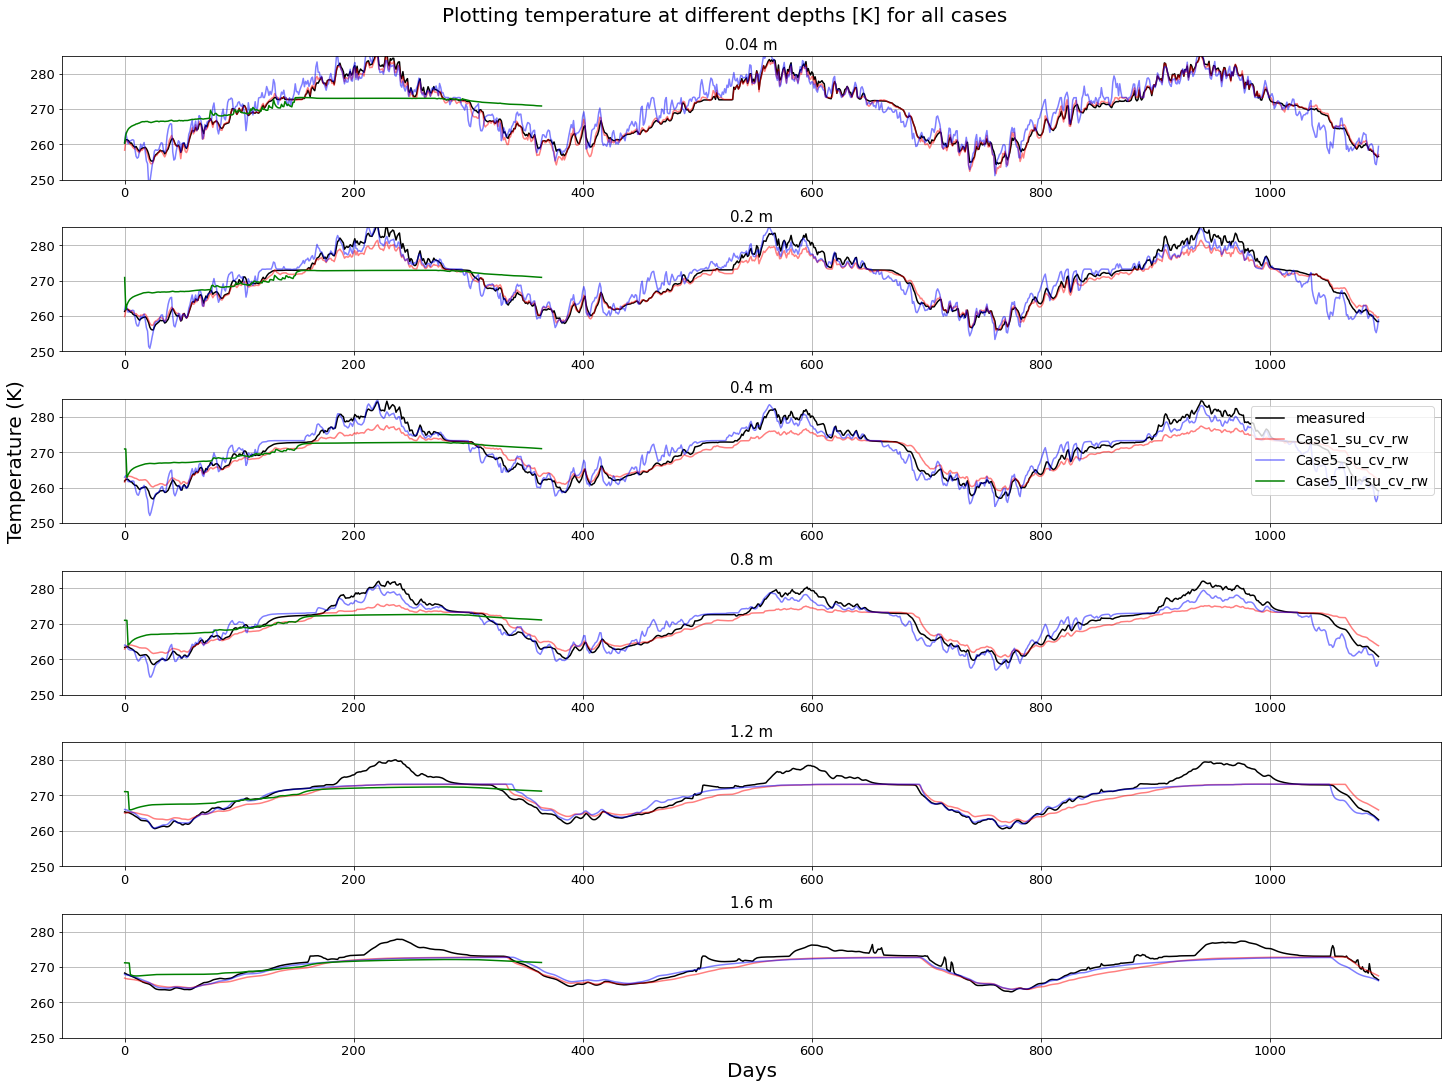

In [55]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] for all cases', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)
time_period_2 = np.arange(0,365)

x = 0
y = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+1096].values, 'k', label=f'measured')
    
    # Simulated
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_1[x:x+1096].values, 'r', label=f'{cf_name_1}',alpha=0.5)
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_2[x:x+1096].values, 'b', label=f'{cf_name_2}',alpha=0.5)
    locals()['f2_ax'+str(j+1)].plot(time_period_2, temp_sim_3[y:y+365].values, 'g', label=f'{cf_name_3}')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+365].values, 'g', label=f'Case 3')
    
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 1096
    y = y + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

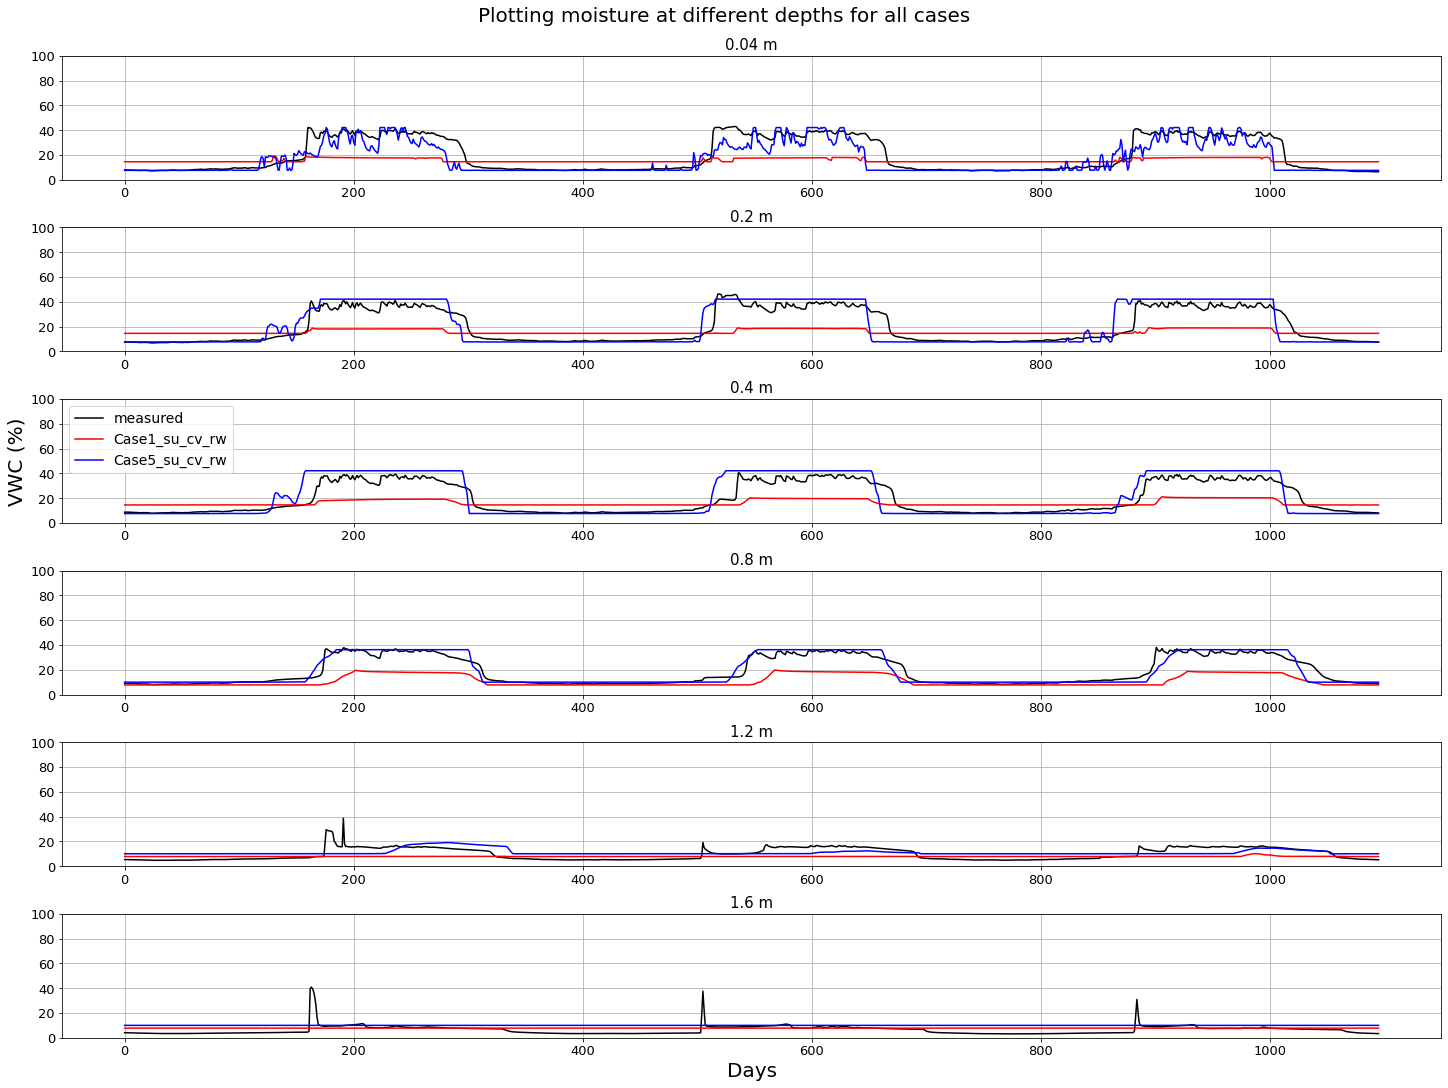

In [56]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting moisture at different depths for all cases', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+1096].values, 'k', label=f'measured')
    
    # Simulated
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim_1[x:x+1096].values, 'r', label=f'{labels[0]}')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim_2[x:x+1096].values, 'b', label=f'{labels[1]}')
    #locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim_3[x:x+1096].values, 'y', label=f'{labels[2]}')
    #locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim_4[x:x+1096].values, 'g', label=f'{labels[3]}')
    
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 1096

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('VWC (%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

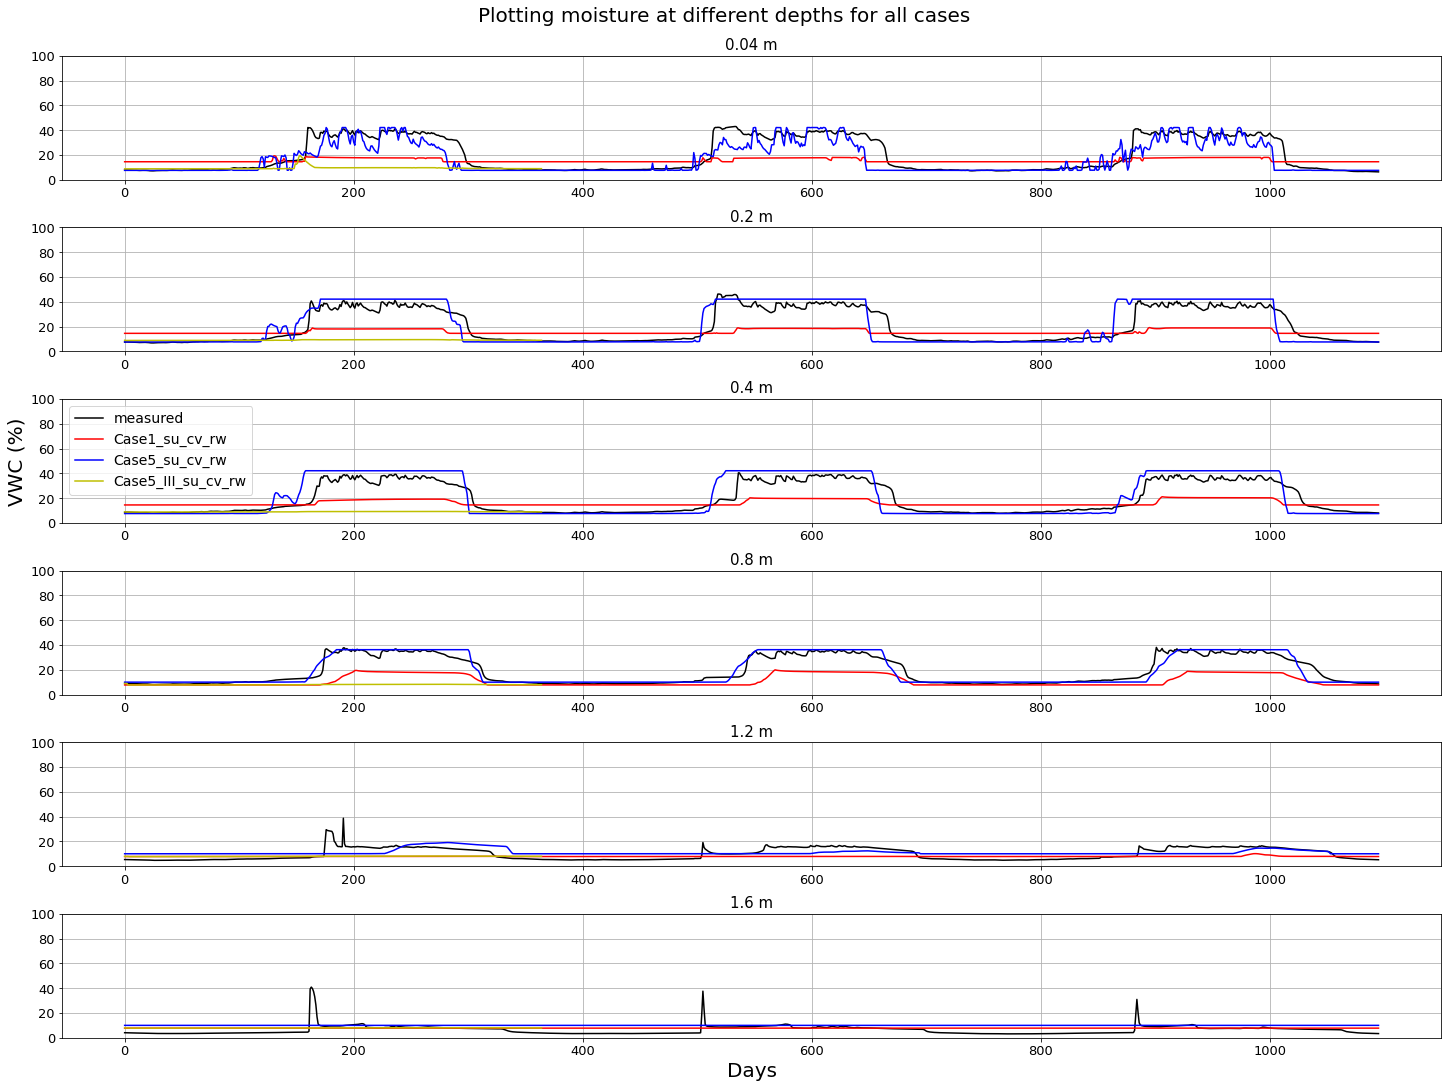

In [57]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting moisture at different depths for all cases', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)
time_period_2 = np.arange(0,365)

x = 0

y = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+1096].values, 'k', label=f'measured')
    
    # Simulated
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim_1[x:x+1096].values, 'r', label=f'{labels[0]}')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim_2[x:x+1096].values, 'b', label=f'{labels[1]}')
    locals()['f2_ax'+str(j+1)].plot(time_period_2, mois_sim_3[y:y+365].values, 'y', label=f'{labels[2]}')
    #locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim_4[x:x+1096].values, 'g', label=f'{labels[3]}')
    
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 1096
    
    y = y + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('VWC (%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Plotting both temperature and moisture

Text(0.5, 0, 'Days')

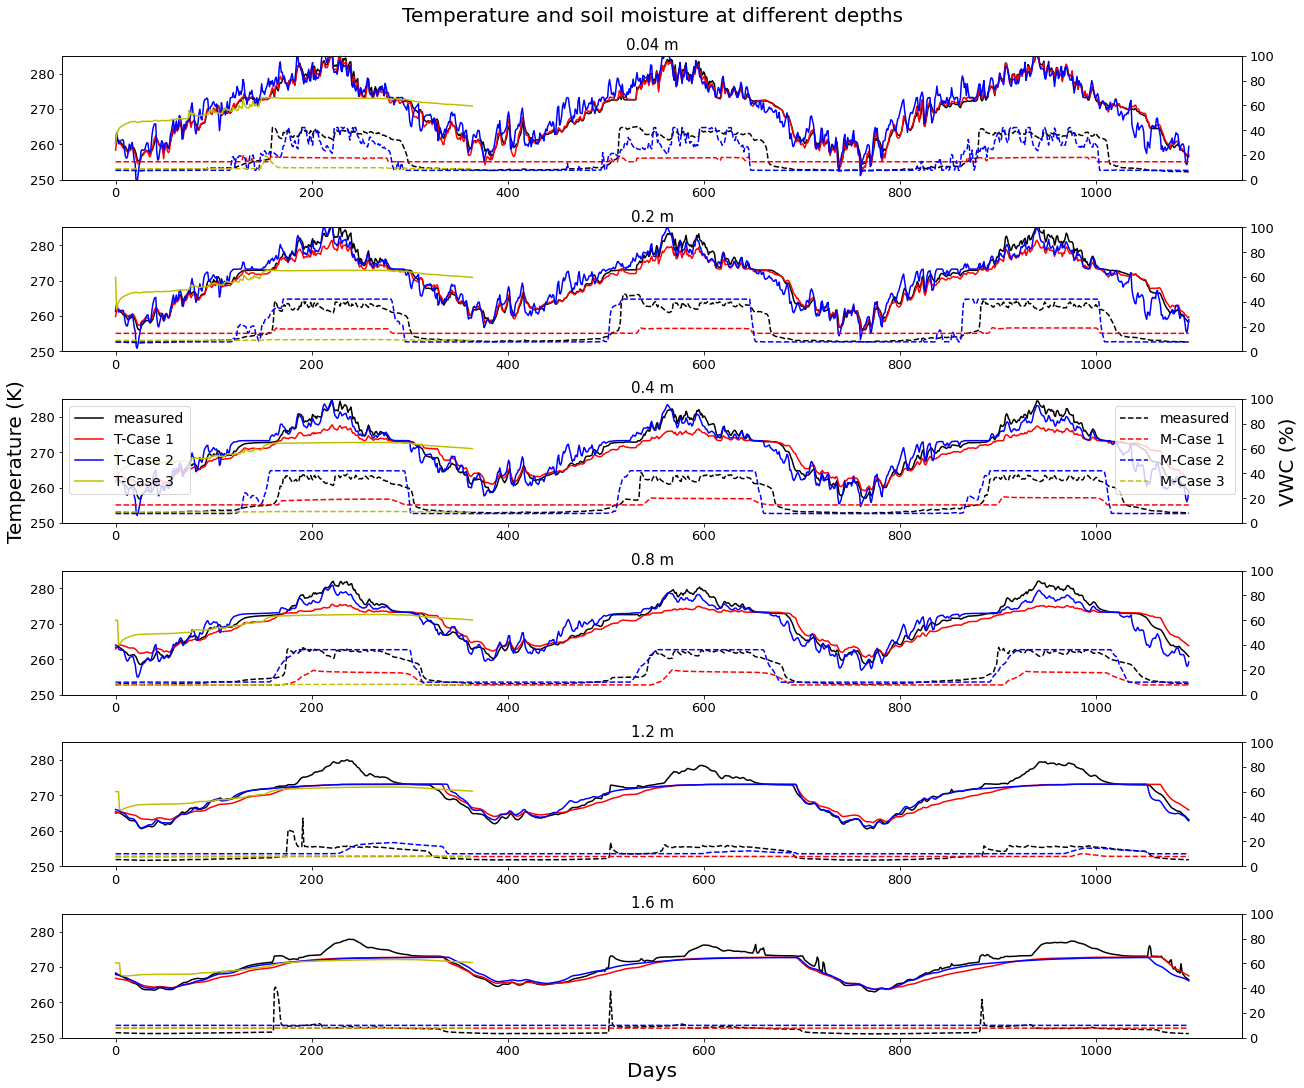

In [58]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)
time_period_1 = np.arange(0,365)

x = 0
y = 0

for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+1096].values, 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_1[x:x+1096].values, 'r', label=f'T-Case 1')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_2[x:x+1096].values, 'b', label=f'T-Case 2')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, temp_sim_3[y:y+365].values, 'y', label=f'T-Case 3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, mois_measured[x:x+1096].values, 'k--', label=f'measured')
    ax2.plot(time_period, mois_sim_1[x:x+1096].values, 'r--', label=f'M-Case 1')
    ax2.plot(time_period, mois_sim_2[x:x+1096].values, 'b--', label=f'M-Case 2')
    ax2.plot(time_period_2, mois_sim_3[y:y+365].values, 'y--', label=f'M-Case 3')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    x = x + 1096
    y = y + 365
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 26.200000000000003, 'Days')

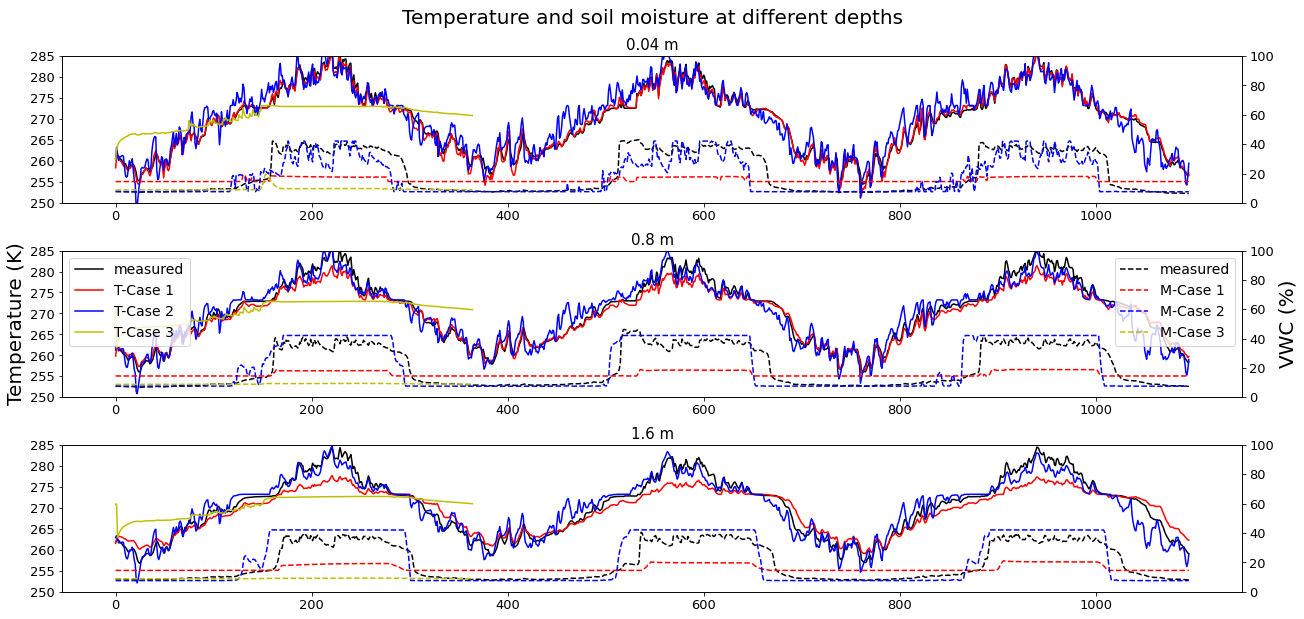

In [59]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
#f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.8, 1.6]

time_period = np.arange(0,1096)
time_period_1 = np.arange(0,365)

x = 0
y = 0

for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+1096].values, 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_1[x:x+1096].values, 'r', label=f'T-Case 1')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_2[x:x+1096].values, 'b', label=f'T-Case 2')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, temp_sim_3[y:y+365].values, 'y', label=f'T-Case 3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, mois_measured[x:x+1096].values, 'k--', label=f'measured')
    ax2.plot(time_period, mois_sim_1[x:x+1096].values, 'r--', label=f'M-Case 1')
    ax2.plot(time_period, mois_sim_2[x:x+1096].values, 'b--', label=f'M-Case 2')
    ax2.plot(time_period_2, mois_sim_3[y:y+365].values, 'y--', label=f'M-Case 3')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    x = x + 1096
    y = y + 365
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 1:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

### Calculating the RMSE value and NSE for the three cases

### RMSE

In [52]:
# Defining the dataframe

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

rmse_df_case1 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
rmse_df_case2 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
rmse_df_case3 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])


In [53]:
#from sklearn.metrics import mean_squared_error

#mean_squared_error(temp_measured[0:365], temp_sim_1[0:365])

In [54]:
#correlation_matrix = np.corrcoef(temp_measured[0:365], temp_sim_1[0:365])

#correlation_xy = correlation_matrix[0,1]
#r_squared = correlation_xy**2

#r_squared

In [55]:
#from sklearn.metrics import r2_score

#r2_score(temp_measured[0:365], temp_sim_1[0:365])

In [56]:
#np.mean(np.power(temp_measured[0:365] - temp_sim_1[0:365],2))

In [57]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

x = 0
y = 0

# Calculating the RMSE for temperature
for j, depth in enumerate(depths):
    rmse_df_case1.iloc[j,0] = np.mean(np.power(temp_measured[x:x+1096] - temp_sim_1[x:x+1096],2))
    rmse_df_case2.iloc[j,0] = np.mean(np.power(temp_measured[x:x+1096] - temp_sim_2[x:x+1096],2))
    rmse_df_case3.iloc[j,0] = np.mean(np.power(temp_measured[x:x+365] - temp_sim_3[x:x+365],2))
    
    rmse_df_case1.iloc[j,1] = np.mean(np.power(mois_measured[x:x+1096] - mois_sim_1[x:x+1096],2))
    rmse_df_case2.iloc[j,1] = np.mean(np.power(mois_measured[x:x+1096] - mois_sim_2[x:x+1096],2))
    rmse_df_case3.iloc[j,1] = np.mean(np.power(mois_measured[x:x+365] - mois_sim_3[x:x+365],2))


    x = x + 1096
    y = y + 365

In [58]:
rmse_df_case2

,Temperature,Moisture
0.04,6.615843,49.499282
0.10,4.750632,46.315634
0.20,4.121537,48.417594
0.40,3.491494,12.511601
0.80,5.052302,21.083009
1.20,3.350777,27.089859
1.60,3.39843,18.59828


#### NSF

In [59]:
# Defining the dataframe

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

nse_df_case1 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
nse_df_case2 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
nse_df_case3 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])


In [60]:
# Defining a Nash-Sutcliffe coefficient
def nse(targets, predictions):
    nse_value = (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
    return nse_value

In [61]:
# Test
x = 1460
nse(temp_measured[x:x+1096], temp_sim_1[x:x+1096])

0.9198672270218338

In [62]:
temp_sim_3

0       260.326172
1       262.718982
2       263.599720
3       264.222888
4       264.618277
           ...    
2557    271.243567
2558    271.231326
2559    271.218936
2560    271.206471
2561    271.194057
Name: Modelled, Length: 2562, dtype: float64

0.7733254692439844

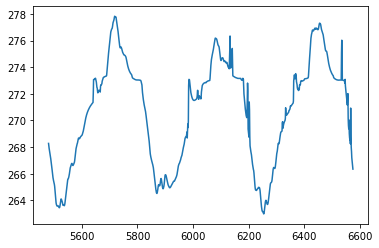

In [63]:
x = 1096*5
plt.plot(temp_measured[x:x+1096])
plt.plot(temp_sim_3[x:x+1096])
nse(temp_measured[x:x+1096],temp_sim_1[x:x+1096])

In [64]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

x = 0
y = 0

# Calculating the RMSE for temperature
for j, depth in enumerate(depths):
    nse_df_case1.iloc[j,0] = nse(temp_measured[x:x+1096], temp_sim_1[x:x+1096])
    nse_df_case2.iloc[j,0] = nse(temp_measured[x:x+1096], temp_sim_2[x:x+1096])
    nse_df_case3.iloc[j,0] = nse(temp_measured_Case5_III[y:y+365], temp_sim_3[y:y+365])
    
    nse_df_case1.iloc[j,1] = nse(mois_measured[x:x+1096], mois_sim_1[x:x+1096])
    nse_df_case2.iloc[j,1] = nse(mois_measured[x:x+1096], mois_sim_2[x:x+1096])
    nse_df_case3.iloc[j,1] = nse(mois_measured_Case5_III[y:y+365], mois_sim_3[y:y+365])


    x = x + 1096
    
    y = y + 365


0.7412833049917803

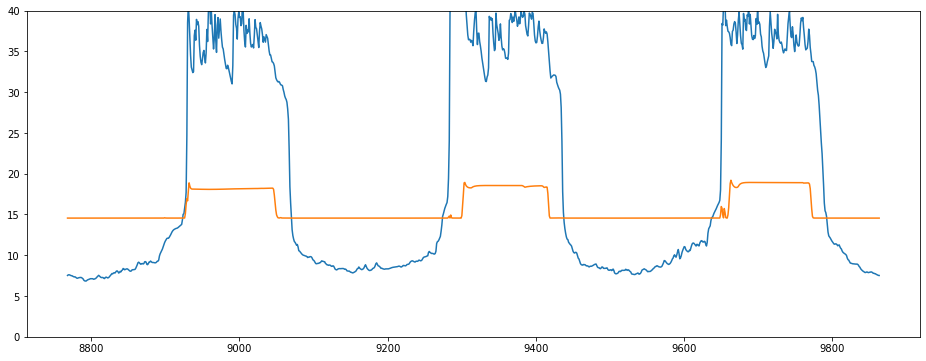

In [65]:
x = 1096*1
plt.figure(figsize=(16,6))
plt.plot(mois_measured[x:x+1096])
plt.plot(mois_sim_1[x:x+1096])
plt.ylim(0,40)
nse(mois_measured[x:x+1096],mois_sim_2[x:x+1096])

In [66]:
nse_df_case3

,Temperature,Moisture
0.04,0.430794,-0.551928
0.10,0.43504,-0.574103
0.20,0.444261,-0.695958
0.40,0.486046,-0.894393
0.80,0.519193,-0.078071
1.20,0.575749,-0.061583
1.60,0.586242,-0.135513


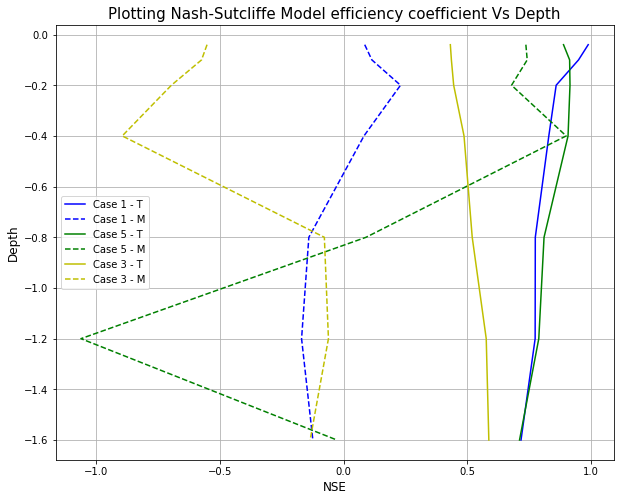

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))

#plt.figure(figsize=(20, 12))

# Case 1
ax.plot(nse_df_case1.iloc[:,0], -nse_df_case1.index,'b', label=f'Case 1 - T')
ax.plot(nse_df_case1.iloc[:,1], -nse_df_case1.index,'b--',label=f'Case 1 - M')

# Case 2
ax.plot(nse_df_case2.iloc[:,0], -nse_df_case1.index,'g', label=f'Case 5 - T')
ax.plot(nse_df_case2.iloc[:,1], -nse_df_case1.index,'g--',label=f'Case 5 - M')

# Case 3
ax.plot(nse_df_case3.iloc[:,0], -nse_df_case1.index,'y', label=f'Case 3 - T')
ax.plot(nse_df_case3.iloc[:,1], -nse_df_case1.index,'y--',label=f'Case 3 - M')


#for i, name in enumerate(cf_names):
#    ax.plot(locals()[f'obj_fn_{i+1}']['total_phi'],label=f'{name}')
    
ax.set_title('Plotting Nash-Sutcliffe Model efficiency coefficient Vs Depth', fontsize=15)
ax.set_ylabel('Depth', fontsize=12)
ax.set_xlabel('NSE', fontsize=12)
ax.grid(b=True)
ax.legend()

In [68]:
x = 0
nse(temp_measured[x:x+365], temp_sim_1[x:x+365])

0.9878285756112817

### Relative contribution of temperature and moisture on the objective function

In [69]:
obj_fn_1

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.003564,0.003564,0,0.001782,0.001782
1,32,0.003449,0.003449,0,0.001765,0.001685
2,63,0.003238,0.003238,0,0.001732,0.001507
3,115,0.003238,0.003238,0,0.001732,0.001507
4,167,0.003238,0.003238,0,0.001732,0.001507


In [70]:
# Finding the index where we will be encountering the minimum objective function

#itrno_best = obj_iteration['total_phi'].idxmin()

for i, name in enumerate(cf_names):
    # Extracting the best iteration by the least value of the objective function
    locals()[f'itrno_best_{i+1}'] = locals()[f'obj_fn_{i+1}']['total_phi'].idxmin()
    
    # The objective function for the best iteration 
    locals()[f'obj_itr_best_{i+1}'] = locals()[f'obj_fn_{i+1}'].iloc[locals()[f'itrno_best_{i+1}'],:]
    
    # Calculating the contribution of the variable temperature and moisture
    locals()[f'con_var_{i+1}'] = np.array(locals()[f'obj_itr_best_{i+1}'][['temp','mois']])/locals()[f'obj_itr_best_{i+1}']['measurement_phi']*100
    

    

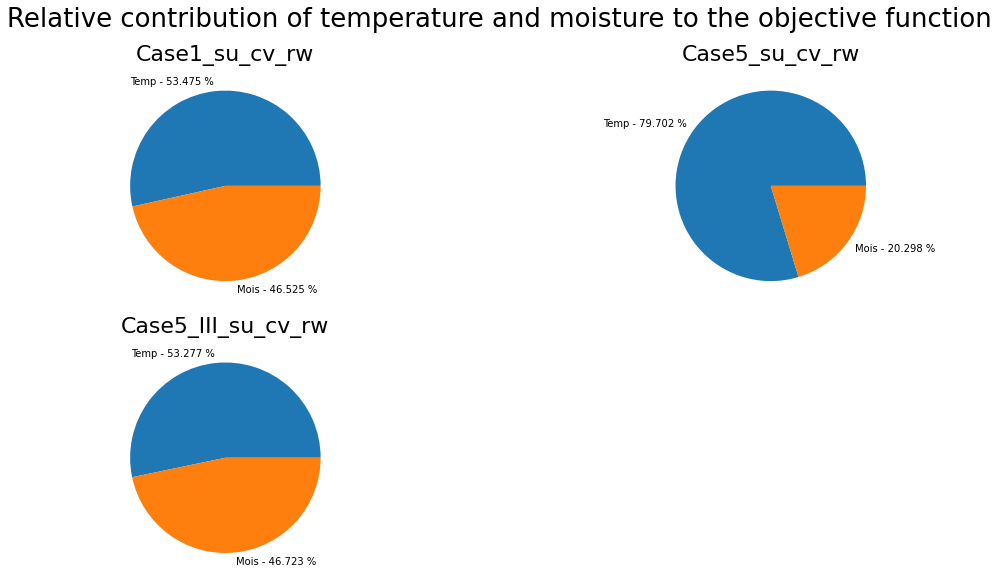

In [73]:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
#f2_ax4 = fig2.add_subplot(spec2[1, 1])


fig2.suptitle('Relative contribution of temperature and moisture to the objective function',fontsize=26)

for i in np.arange(3):
    temp_contri = np.round(locals()[f'con_var_{i+1}'][0],3)
    mois_contri = np.round(locals()[f'con_var_{i+1}'][1],3)
    
    mylabels=[f'Temp - {temp_contri} %',f'Mois - {mois_contri} %']
    locals()[f'f2_ax{i+1}'].pie(locals()[f'con_var_{i+1}'],labels=mylabels)
    locals()[f'f2_ax{i+1}'].set_title(f'{labels[i]}',fontsize=22)
    #locals()[f'f2_ax{i+1}'].legend(fontsize=20)


### Parameters 

In [74]:
###  Extracting the parameter sensitivity for the three and creating a single dataframe

### Creating a dataframe with the parameters (Note that Case 1 has only 20 parameters)

#locals()[f'best_params_{i+1}'] = pd.read_csv(f'{comp_dir}/best_params_{name}.csv',index_col=0)


#params_itr = pd.read_csv(f'{comp_dir}/best_params_{cf_name_1}.csv',index_col=0)
#params_itr.rename(columns={"3":f"{cf_name_1}"},inplace=True)

#sen_cases = pd.DataFrame(columns=sen_itr.index)


# Total number of cases:
case_nos = np.arange(1,4,1)


# For Case 1
par_itr_1 = pd.read_csv(f'{comp_dir}/best_params_Case1_su_cv_rw.csv',index_col=0)

# Renaming the column
par_itr_1.rename(columns= {'3':f'{cf_name_1}'},inplace=True)

#for i, name in enumerate(cf_names):
    #locals()[f'sen_itr_1'] = pd.read_csv(f'{comp_dir}/best_sen_{name}.csv',index_col=0)

par_itr_1 = par_itr_1.transpose()



# For Case 5 
par_itr_2 = pd.read_csv(f'{comp_dir}/best_params_Case5_su_cv_rw.csv',index_col=0)

# Renaming the column
par_itr_2.rename(columns= {'14':f'{cf_name_2}'},inplace=True)


par_itr_2 = par_itr_2.transpose()


# For Case5_III 
par_itr_3 = pd.read_csv(f'{comp_dir}/best_params_Case5_III_su_cv_rw.csv',index_col=0)

# Renaming the column
par_itr_3.rename(columns= {'6':f'{cf_name_3}'},inplace=True)

par_itr_3 = par_itr_3.transpose()

In [75]:
# Create one single dataframe with all the sensitive values

par_cases = pd.concat([par_itr_2, par_itr_3])


#sen_case2_missing = pd.DataFrame(columns=['n_m':0, 'wr_m', 'tcs_p', 'tcs_m', 'tcd_p', 'tcd_m', 'af_p', 'af_m', 'auf_p', 'auf_m','den_p', 'den_m'])

# Adding the columns that are missing
par_case2_missing = {'n_m':0, 'wr_m':0, 'tcs_p':0, 'tcs_m':0, 'tcd_p':0, 'tcd_m':0, 'af_p':0, 'af_m':0, 'auf_p':0, 'auf_m':0,'den_p':0, 'den_m':0}


# Appending the columns
par_cases = par_cases.append(par_case2_missing, ignore_index = True)


# Filling the column with 0s
par_cases.fillna(0,inplace=True)

# Rearranging the columns 
par_cases = par_cases[['alpha_p', 'alpha_m', 'n_p', 'n_m', 'wr_p', 'wr_m', 'tcs_p', 'tcs_m',
       'tcd_p', 'tcd_m', 'af_p', 'af_m', 'auf_p', 'auf_m', 'por_p', 'por_m',
       'perm_p', 'perm_m', 'den_p', 'den_m', 'b_bc']]

# Adding the values from Case 1
par_cases.iloc[2,:] = par_itr_1.iloc[0,:]

# Renindexing the dataframe
par_cases = par_cases.reindex([2,0,1])

# Renaming the rows
#sen_cases.rename(index={0:"Case5_su_cv_rw",1:"Case1_su_cv_rw"},inplace=True)
par_cases.rename(index={0:"Case5_su_cv_rw",2:"Case1_su_cv_rw",1:"Case5_III_su_cv_rw"},inplace=True)


par_cases

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m,b_bc
Case1_su_cv_rw,0.002500,0.001814,2.04969,2.05003,0.228023,0.161782,0.442337,0.951793,0.1037,0.984239,...,1.49941,0.485737,0.698884,0.638408,0.481638,1.336660e-11,1.187990e-13,900.0,1900.0,268.45
Case5_su_cv_rw,0.011273,0.000475,1.48723,0.00000,0.178925,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.00000,0.000000,0.000000,0.421524,0.362321,1.336660e-11,3.045050e-14,0.0,0.0,268.45
Case5_III_su_cv_rw,0.006875,0.002575,1.50115,0.00000,0.134712,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.00000,0.000000,0.000000,0.646619,0.483211,9.356590e-11,7.193600e-14,0.0,0.0,268.45


In [76]:
best_params_df = par_cases.copy()

In [78]:
best_params_df_T = best_params_df.transpose()
best_params_df_T

,Case1_su_cv_rw,Case5_su_cv_rw,Case5_III_su_cv_rw
alpha_p,2.500000e-03,1.127320e-02,6.874620e-03
alpha_m,1.813810e-03,4.752780e-04,2.574920e-03
n_p,2.049690e+00,1.487230e+00,1.501150e+00
n_m,2.050030e+00,0.000000e+00,0.000000e+00
wr_p,2.280230e-01,1.789250e-01,1.347120e-01
wr_m,1.617820e-01,0.000000e+00,0.000000e+00
tcs_p,4.423370e-01,0.000000e+00,0.000000e+00
tcs_m,9.517930e-01,0.000000e+00,0.000000e+00
tcd_p,1.037000e-01,0.000000e+00,0.000000e+00
tcd_m,9.842390e-01,0.000000e+00,0.000000e+00


In [79]:
best_params_df_T.to_csv('Final_comp_cases_data/Best_params_df.csv')

In [242]:
#for i, name in enumerate(cf_names):
    #locals()[f'best_params_{i+1}'] = pd.read_csv(f'{comp_dir}/best_params_{name}.csv',index_col=0)
    #locals()[f'best_params_{i+1}'].rename(columns={"22":f"{labels[i]}"},inplace=True)
    

#best_params_3.rename(columns={"5":f"{labels[2]}"},inplace=True)
#best_params_4.rename(columns={"4":f"{labels[3]}"},inplace=True)

### Paramters for  the input file:
- I transfered the files from the respective folders
- Considering the Case5_II_A case to compare with resultant parameter values

In [244]:
par_data_names = ['Case1_su_cv_par_data','Case5_su_cv_par_data','Case5_III_su_cv_par_data']

In [245]:
for i, name in enumerate(cf_names):
    
        locals()[f'par_data_{i+1}'] = pd.read_csv(f'{comp_dir}/{par_data_names[i]}.csv',index_col=0)

In [250]:
par_data_3

,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
parnme,,,,,,,,,
alpha_p,none,factor,1.000000e-02,2.500000e-03,1.250000e-02,alpha_p_gp,1.0,0.0,1
alpha_m,none,factor,1.824914e-03,4.562286e-04,3.193600e-03,alpha_m_gp,1.0,0.0,1
n_p,none,factor,1.500000e+00,1.025000e+00,2.050000e+00,n_p_gp,1.0,0.0,1
wr_p,none,factor,1.000000e-01,2.400000e-02,2.000000e-01,wr_p_gp,1.0,0.0,1
por_p,none,factor,6.373900e-01,1.590000e-01,8.500000e-01,por_p_gp,1.0,0.0,1
por_m,none,factor,4.810308e-01,1.202577e-01,8.418038e-01,por_m_gp,1.0,0.0,1
perm_p,none,factor,5.346622e-11,1.336656e-11,9.356589e-11,perm_p_gp,1.0,0.0,1
perm_m,none,factor,1.000000e-13,2.500000e-14,1.750000e-13,perm_m_gp,1.0,0.0,1
pen_s,none,factor,2.000000e-02,5.000000e-03,3.500000e-02,pen_s_gp,1.0,0.0,1


In [252]:
par_data_2

,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
parnme,,,,,,,,,
alpha_p,none,factor,1.000000e-02,2.500000e-03,1.750000e-02,alpha_p_gp,1.0,0.0,1
alpha_m,none,factor,1.825000e-03,4.600000e-04,3.200000e-03,alpha_m_gp,1.0,0.0,1
n_p,none,factor,2.050000e+00,1.025000e+00,3.075000e+00,n_p_gp,1.0,0.0,1
wr_p,none,factor,2.240000e-01,5.610000e-02,3.926000e-01,wr_p_gp,1.0,0.0,1
por_p,none,factor,6.370000e-01,1.593500e-01,1.115000e+00,por_p_gp,1.0,0.0,1
por_m,none,factor,4.810000e-01,1.200000e-01,8.418000e-01,por_m_gp,1.0,0.0,1
perm_p,none,factor,5.346000e-11,1.336600e-11,9.356500e-11,perm_p_gp,1.0,0.0,1
perm_m,none,factor,1.000000e-13,2.500000e-14,1.750000e-13,perm_m_gp,1.0,0.0,1
pen_s,none,factor,2.000000e-02,5.000000e-03,3.500000e-02,pen_s_gp,1.0,0.0,1


In [253]:
#best_params_df['parval1'] = Case5_II_A_glm_par_data['parval1']
#best_params_df['parlbnd'] = Case5_II_A_glm_par_data['parlbnd']
#best_params_df['parubnd'] = Case5_II_A_glm_par_data['parubnd']

#best_params_df

* Note that for some cases we are considering a slightly different value since the simulations cannot run under these lbnd and ubnd values

In [254]:
### Storing the the best parameter dataset in an csv file to add the literature values

#best_params_df.to_csv('best_params.csv',sep=',')